In [ ]:
# Import Necessary Libraries
# Import Data Manipulation libraries
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.mode.chained_assignment = None

### <b><span style='color:#85BB65'>|</span> Domain Knowledge</b>

<br>

1. **`work_year` [categorical] :** The year the salary was paid.

2. **`experience_level` [categorical] :** The experience level in the job during the year.

3. **`employment_type` [categorical] :** The type of employment for the role.

4. **`job_title` [categorical] :** The role worked in during the year.

5. **`salary` [numerical] :** The total gross salary amount paid.

6. **`salary_currency` [categorical] :** The currency of the salary paid as an ISO 4217 currency code.

7. **`salaryinusd` [numerical] :** The salary in USD.

8. **`employee_residence` [categorical]:** Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **`remote_ratio` [ratio]:** The overall amount of work done remotely.

10. **`company_location` [categorical]:** The country of the employer's main office or contracting branch.

11. **`company_size` [categorical]:** The median number of people that worked for the company during the year as an ISO 3166 country code.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/khuzilafwa/Dataset-DS/main/ds_salaries.csv')

In [ ]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


# 1. Exploratory Data Analysis (EDA)

## 1.1 Check Null Values

In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 1.2 Check Duplicate Data

In [ ]:
data.shape

(3755, 11)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicated rows:", duplicate_rows_data)

Number of duplicated rows:       work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_

In [ ]:
# drop duplicate data
data = data.drop_duplicates()

In [ ]:
data.shape

(2584, 11)

## 1.3 Check Unique Value in Each Column

In [ ]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Fungsi untuk statistik deskriptif
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Loop semua kolom lalu dicek apakah kolom bersifat objek (categorical)

for column in data.columns:
  if data[column].dtypes == object:
    num_distinct_values = data[column].unique()
    distinct_values = data[column].unique

    print(f"{column}: {num_distinct_values} -> {distinct_values}\n")

experience_level: ['SE' 'MI' 'EN' 'EX'] -> <bound method Series.unique of 0       SE
1       MI
2       MI
3       SE
4       SE
        ..
3750    SE
3751    MI
3752    EN
3753    EN
3754    SE
Name: experience_level, Length: 2584, dtype: object>

employment_type: ['FT' 'CT' 'FL' 'PT'] -> <bound method Series.unique of 0       FT
1       CT
2       CT
3       FT
4       FT
        ..
3750    FT
3751    FT
3752    FT
3753    CT
3754    FT
Name: employment_type, Length: 2584, dtype: object>

job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 '

## 1.4 Rename the Value for better understanding

In [ ]:
data.loc[:,'experience_level'] = data.loc[:,'experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry Level',
    'EX': 'Executive',
    'MI': 'Mid/Intermediate Level'
})

data.loc[:, 'employement_type'] = data.loc[:,'employment_type'].replace({
    'FL':'Freelancae',
    'CT':'Contractor',
    'FT':'Full Time',
    'PT':'Part Time'
})

data.loc[:, 'remote_ratio'] = data.loc[:,'remote_ratio'].replace({
    0: 'On-Site',
    50: 'Hybrid',
    100: 'Remote'
})

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employement_type
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L,Full Time
1,2023,Mid/Intermediate Level,CT,ML Engineer,30000,USD,30000,US,Remote,US,S,Contractor
2,2023,Mid/Intermediate Level,CT,ML Engineer,25500,USD,25500,US,Remote,US,S,Contractor
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M,Full Time
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M,Full Time


## 1.5 Group the Job Title

In [ ]:
#print(data['job_title'].nunique())
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
def job_category(job_title):
    data_engineering = ['Data Engineer', 'Analytic Engineer','BI Data Engineer',
                        'Power BI Developer','Business Intelligence Engineer',
                        'Cloud Data Engineer','Marketing Data Engineer','Azure Data Engineer',
                        'Data Infrastructure Engineer','ETL Engineer','Data DevOps Engineer',
                        'Data Specialist','Data Management Specialist'
                        ]
    data_scientist = ['Data Scientist', 'Applied Scientist','Research Scientist',
                      'Data Analyst','BI Data Analyst', 'Business Data Analyst',
                      'BI Analys', 'BI Developer','Principal Data Scientist','Data Strategist',
                      'Staff Data Analyst','Compliance Data Analyst','Financial Data Analyst',
                      'Product Data Analyst','Staff Data Scientist','Data Quality Analyst',
                      'Data Operations Analyst','Analytics Engineer','Insight Analyst',
                      'Data Science Consultant','Power BI Developer','Data Analytics Engineer',
                      'Data Analytics Consultant','Product Data Scientist']

    machine_learning = ['Machine Learning Engineer','ML Engineer',
                        'Principal Machine Learning Engineer','3D Computer Vision Researcher',
                        'AI/Computer Vision Engineer', 'Computer Vision Engineer','AI Scientist',
                        'Applied Machine Learning Engineer','Machine Learning Software Engineer',
                        'AI Developer','Deep Learning Researcher','MLOps Engineer',
                        'Applied Machine Learning Scientist','AI Programmer','Machine Learning Research Engineer',
                        'NLP Engineer']

    data_architecture = ['Data Architect', 'Big Data Architect','Cloud Data Architect',
                         'Principal Data Architect','Data Modeler']
    management = ['Data Science Manager', 'Director of Data Science', 'Head of Data Science',
                  'Data Scientist Lead', 'Head of Machine Learning', 'Manager Data Management',
                  'Data Analytics Manager','Data Science Tech Lead','Lead Machine Learning Engineer',
                  'Machine Learning Manager','Head of Data','Data Manager']

    if job_title in data_engineering:
      return "Data Engineering"
    elif job_title in data_scientist:
      return "Data Scientist"
    elif job_title in machine_learning:
      return "Machine Learning"
    elif job_title in data_architecture:
      return "Data Architecture"
    elif job_title in management:
      return "Management"
    else:
      return "Others"

data.loc[:,'job_category'] = data['job_title'].apply(job_category)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employement_type,job_category
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L,Full Time,Data Scientist
1,2023,Mid/Intermediate Level,CT,ML Engineer,30000,USD,30000,US,Remote,US,S,Contractor,Machine Learning
2,2023,Mid/Intermediate Level,CT,ML Engineer,25500,USD,25500,US,Remote,US,S,Contractor,Machine Learning
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M,Full Time,Data Scientist
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M,Full Time,Data Scientist


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employement_type,job_category
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L,Full Time,Data Scientist
1,2023,Mid/Intermediate Level,CT,ML Engineer,30000,USD,30000,US,Remote,US,S,Contractor,Machine Learning
2,2023,Mid/Intermediate Level,CT,ML Engineer,25500,USD,25500,US,Remote,US,S,Contractor,Machine Learning
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M,Full Time,Data Scientist
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M,Full Time,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,FT,Data Scientist,412000,USD,412000,US,Remote,US,L,Full Time,Data Scientist
3751,2021,Mid/Intermediate Level,FT,Principal Data Scientist,151000,USD,151000,US,Remote,US,L,Full Time,Data Scientist
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,Remote,US,S,Full Time,Data Scientist
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,Remote,US,L,Contractor,Data Scientist


## 1.6 Adjust Salary to Present Value

#### **<span style='color:#85BB65'>Dealing with Inflation rate</span>**
<br>

![](https://www.halifax.co.uk/assets/financial-planning-centre/inflation-projection.png)


<br>

In order to accurately compare salaries across different years, it is essential to account for inflation. Inflation is the rate at which the general price levels of goods and services increase over time. By adjusting salaries to a common currency and year, we can make meaningful comparisons between them.

<br>

![](https://timeseriesreasoning.files.wordpress.com/2021/05/88f72-1gjxkmcxhudin7t07swj0mq.png)



<br>

To adjust salaries from different years to their present value for comparison purposes. We will be using a dataset containing information on employee salaries, work years, and currency.

<br>

### <b><span style='color:#85BB65'>|</span> Explanation:</b>

<br>

1. **Define inflation rates** for the United States (US) and global markets. These rates will be used to adjust the salaries based on the year and currency.

2. Create a function **adjust_salary()** that takes a row from the dataset as input and calculates the adjusted salary based on the work year, original salary, and currency. If the work year is 2023, the salary does not need to be adjusted, and the original salary is returned.

3. Determine the **number of years between the work year and 2023** . Use the appropriate inflation rate based on the currency, either the US or global inflation rate.

4. Calculate the adjusted salary by **applying the inflation rate** to the original salary for each year from the work year to 2023.

5. **Apply the adjust_salary() function** to the dataset using the apply() method, and create a new column 'adjusted_salary' with the adjusted salary values.
<br>

> By accounting for inflation, we can gain a better understanding of the true value of salaries in different years and currencies.

In [ ]:
#Inflation Rates
us_inflation_rates = {2019:0.0181,
                      2020:0.0123,
                      2021: 0.0470,
                      2022:0.065}
global_inflation_rates = {2019:0.0219,
                          2020:0.0192,
                          2021: 0.0350,
                          2022:0.088}

In [ ]:
# Adjusting Salary Function
def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for i in range(year, 2023):
      if currency == 'USD':
        inflation_rate = us_inflation_rates[i]
      else:
        inflation_rate = global_inflation_rates[i]

      adjusted_salary = adjusted_salary * (1+inflation_rate)

  return adjusted_salary

In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis =1)

In [ ]:
data[['work_year', 'salary_currency','salary_in_usd', 'adjusted_salary']].tail()

,work_year,salary_currency,salary_in_usd,adjusted_salary
3750,2020,USD,412000,465053.312718
3751,2021,USD,151000,168373.305000
3752,2020,USD,105000,118520.868532
3753,2020,USD,100000,112877.017650
3754,2021,INR,94665,106600.363200


## 1.7 Job Distribution

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
value_counts

Data Scientist       47.445820
Data Engineering     24.419505
Machine Learning     12.848297
Others                7.391641
Management            5.185759
Data Architecture     2.708978
Name: job_category, dtype: float64

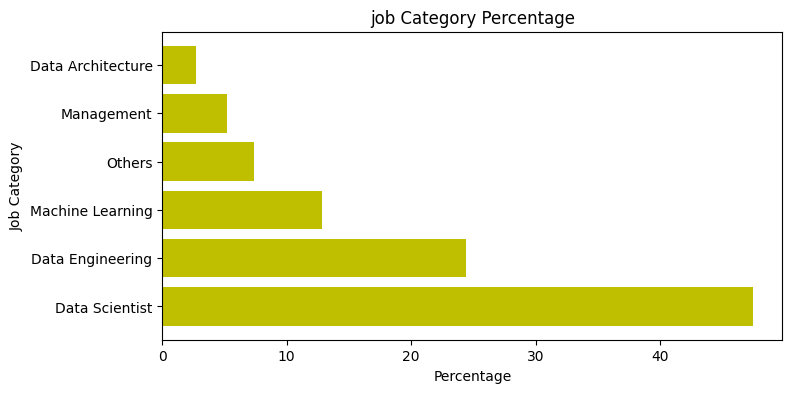

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.barh(value_counts.index, value_counts.values, color = 'y') #Set up axis utama
ax.set_title('job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

plt.show()

## 1.8 Distribution across different employment types

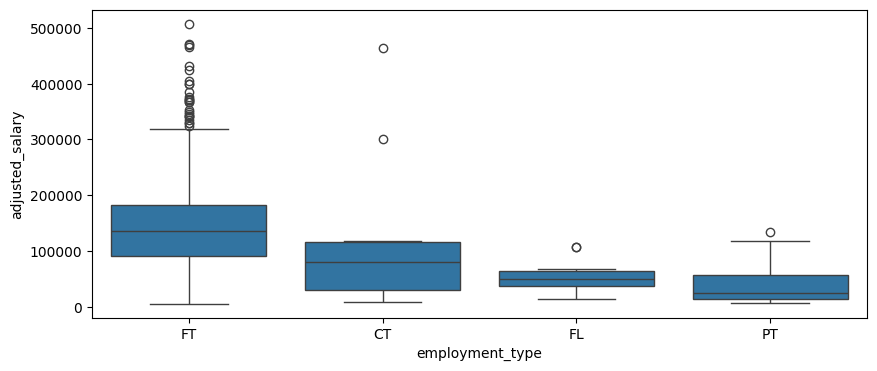

In [ ]:
plt.figure(figsize=(10,4))

sns.boxplot(data=data, x='employment_type', y='adjusted_salary')

plt.show()

## 1.9 Distribution of Salary

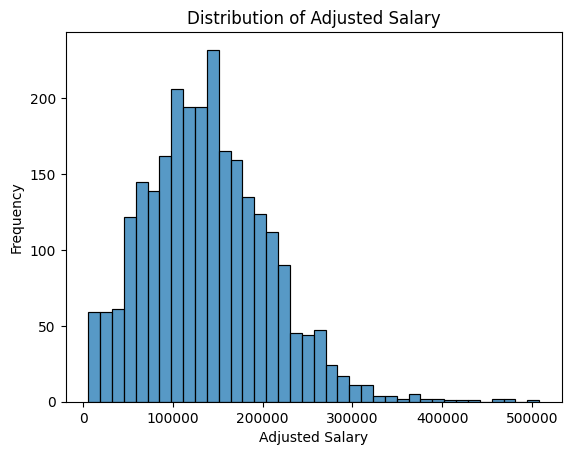

In [ ]:
sns.histplot(data['adjusted_salary'])

plt.title('Distribution of Adjusted Salary')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Salary')
plt.show()

## 1.10 Boxplot and Swarmplot of Adjusted Salary

<ipython-input-27-39ea39a780ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')


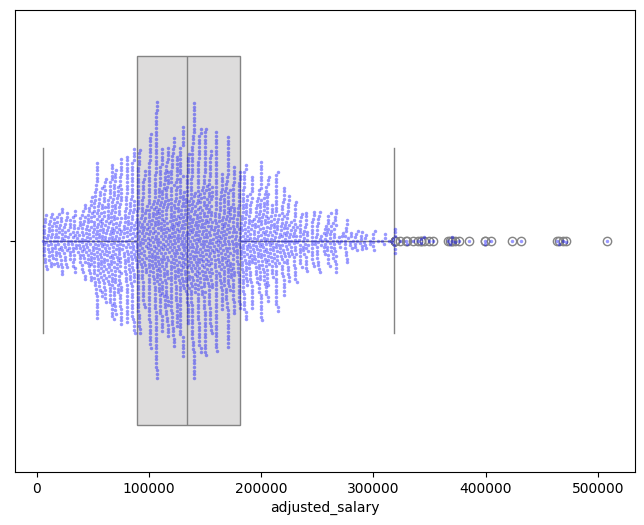

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha=0.4, size=2.5)

plt.show()

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

# 2. Questions
- Show the **median** adjusted data scientist salary, for each experience level
- Show the number of records for each company_location, sorted descending
- From this data, show the **median** adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'employement_type',
       'job_category', 'adjusted_salary'],
      dtype='object')

In [ ]:
# Show the median adjusted data scientist salary, for each experience level
# loc, adjusted salary, group by
ds_salary = data.loc[data['job_category'] == 'Data Scientist',['job_category','adjusted_salary','experience_level']]
ds_salary

,job_category,adjusted_salary,experience_level
0,Data Scientist,85847.000000,Senior
3,Data Scientist,175000.000000,Senior
4,Data Scientist,120000.000000,Senior
5,Data Scientist,222200.000000,Senior
6,Data Scientist,136000.000000,Senior
7,Data Scientist,219000.000000,Senior
8,Data Scientist,141000.000000,Senior
9,Data Scientist,147100.000000,Senior
10,Data Scientist,90700.000000,Senior
11,Data Scientist,130000.000000,Senior


In [ ]:
ds_salary_med = ds_salary.groupby('experience_level')['adjusted_salary'].median()
ds_salary_med

experience_level
Entry Level                65486.867
Executive                 167205.000
Mid/Intermediate Level     93918.000
Senior                    145899.305
Name: adjusted_salary, dtype: float64

**Answer:**
1. Between Mid/Intermediate Level and Senior Level there is the largest median salary gap
2. Executive Level has median salary almost 3 times that of Entry Level

In [ ]:
# Show the number of records for each company_location, sorted descending
num_location = data.groupby('company_location')['company_location'].count().sort_values(ascending=False)
num_location

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
ES      44
FR      33
BR      15
PT      14
AU      14
NL      13
GR      11
MX      10
IE       7
SG       6
AT       6
JP       6
CH       5
PL       5
TR       5
NG       5
LV       4
PR       4
DK       4
PK       4
CO       4
SI       4
BE       4
UA       4
IT       4
RU       3
LU       3
TH       3
AE       3
AR       3
AS       3
HR       3
CZ       3
FI       3
HU       2
GH       2
SE       2
CF       2
RO       2
ID       2
EE       2
LT       2
IL       2
KE       2
CL       1
AM       1
AL       1
BA       1
SK       1
BO       1
BS       1
IQ       1
IR       1
HN       1
CN       1
MA       1
CR       1
HK       1
PH       1
NZ       1
DZ       1
MY       1
EG       1
MT       1
MK       1
MD       1
VN       1
Name: company_location, dtype: int64

**Answer**
1. As the world's leading country in technology and economy, significantly US have the most companies that employ IT workers
2. Despite being developing country, India in 4th place surpasses other Europe Countries, this makes India the only one country in Asia in top 10.

In [ ]:
# From this data, show the median adjusted salary of employee who works for company located in Indonesia (ID),
# do you think that value represents the salary in Indonesia? why? why not?
salary_id = data.loc[data['company_location'] == 'ID', ['company_location','adjusted_salary']]
salary_id_med = salary_id.groupby('company_location')['adjusted_salary'].median()
salary_id_med


company_location
ID    37045.804
Name: adjusted_salary, dtype: float64

**Answer**
The value doesn't represent the salary in Indonsia. This far exceeds the minimum salary and majority workers can achieve in Indonesia. The minimum regional salary in Jakarta is currently only around 4000 USD a year
